In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [28]:
data = pd.read_csv("train_cleaned.csv")
data.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,3735.1380,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,443.4228,0,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,1999,2097.2700,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,1998,732.3800,0,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
4,8.93,0.000000,53.8614,1987,994.7052,0,1,0,0,0,...,1,0,0,0,0,1,0,1,0,0


# Divide model


In [29]:
x = data.drop(['Item_Outlet_Sales'], axis = 1)
y = data['Item_Outlet_Sales']
x.shape, y.shape

((8523, 45), (8523,))

In [30]:
from sklearn.model_selection import train_test_split as tts
train_x, test_x, train_y, test_y = tts(x, y, random_state = 56)

In [31]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_absolute_error as mae 

In [32]:
lr = LR()
lr.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
train_predict = lr.predict(train_x)
k = mae(train_predict, train_y)
print("Train error: ", k)

Train error:  821.4206146753685


In [34]:
test_predict = lr.predict(test_x)
k = mae(test_predict, test_y)
print("Train error: ", k)

Train error:  875.2688982985248


In [35]:
lr.coef_

array([ 1.78450035e-01, -3.84642222e+02,  1.54980674e+01, -1.84444754e+01,
       -3.78808067e+01,  3.31502849e+01,  4.06819896e+01,  4.76424149e+01,
       -8.35938826e+01,  2.81126002e+00, -1.19848265e+00, -1.57618523e+02,
        6.71387323e+01, -5.33492180e+01, -3.06556852e+01,  4.23212148e+01,
       -2.30260247e+01, -4.27876198e+01, -7.54301779e+01, -3.65824873e+00,
       -7.87129822e+01,  2.60470952e+02,  1.41600650e+01, -1.46932400e+01,
        9.42279781e+01, -4.64999137e+02, -5.51947683e+01,  1.53301072e+02,
       -4.68181522e+01, -4.71597876e+02,  5.87820902e+02,  1.24396682e+02,
       -8.80903933e+01,  3.17298874e+02, -5.61172040e+01, -5.51947683e+01,
        4.84885546e+02, -2.99023193e+01, -2.10416205e+02,  1.89607361e+02,
        2.08088447e+01, -9.36597012e+02,  3.95594262e+02, -4.68181522e+01,
        5.87820902e+02])

No handles with labels found to put in legend.


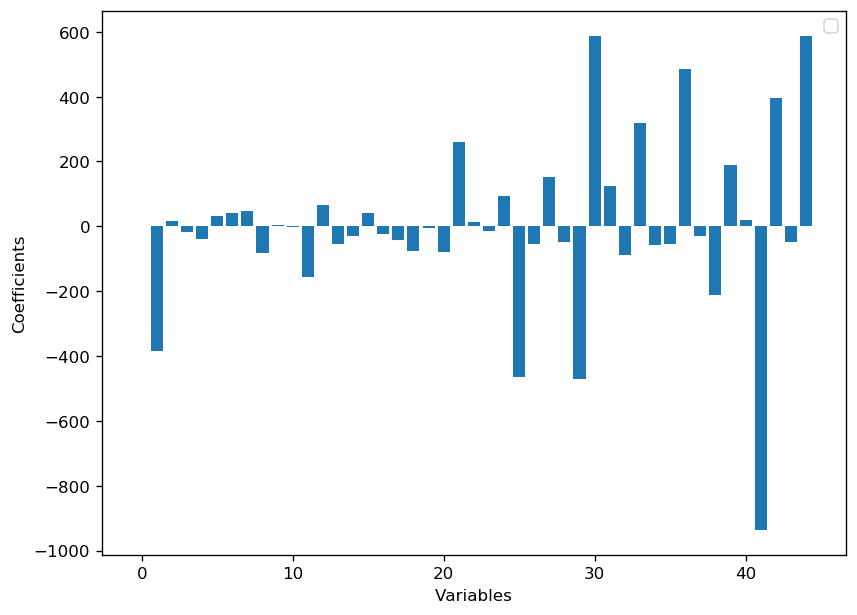

In [36]:
plt.figure(figsize = (8, 6), dpi = 120, facecolor='w', edgecolor='b')
x = range(len(train_x.columns))
y = lr.coef_
plt.bar(x,y)
plt.xlabel("Variables")
plt.ylabel("Coefficients")
plt.legend()

# Checking Assumptions

In [37]:
residuals = pd.DataFrame({
    'fitted_values': test_y,
    'predicted_values': test_predict
})

residuals['residual'] = residuals['fitted_values'] - residuals['predicted_values']
residuals.head()

,fitted_values,predicted_values,residual
2172,697.7584,906.204648,-208.446248
6228,1414.1592,2544.719495,-1130.560295
2404,3078.6592,3008.957438,69.701762
99,1314.2892,3045.197114,-1730.907914
4945,1403.5064,1453.011713,-49.505313


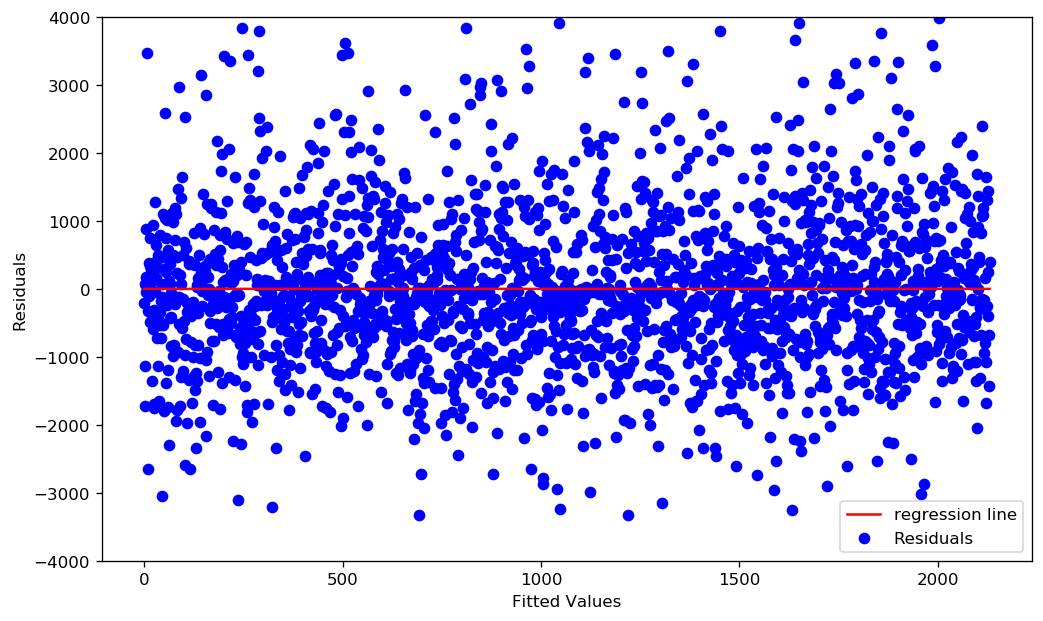

In [38]:
plt.figure(figsize = (10,6), dpi = 120, facecolor='w', edgecolor='b')
k = range(0, 2131)
f = [0 for i in range(0,2131)]
plt.scatter(k, residuals.residual[:], color = 'blue', label = 'Residuals')
plt.plot(k, f, color = 'red', label = 'regression line')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.ylim(-4000, 4000)
plt.legend()

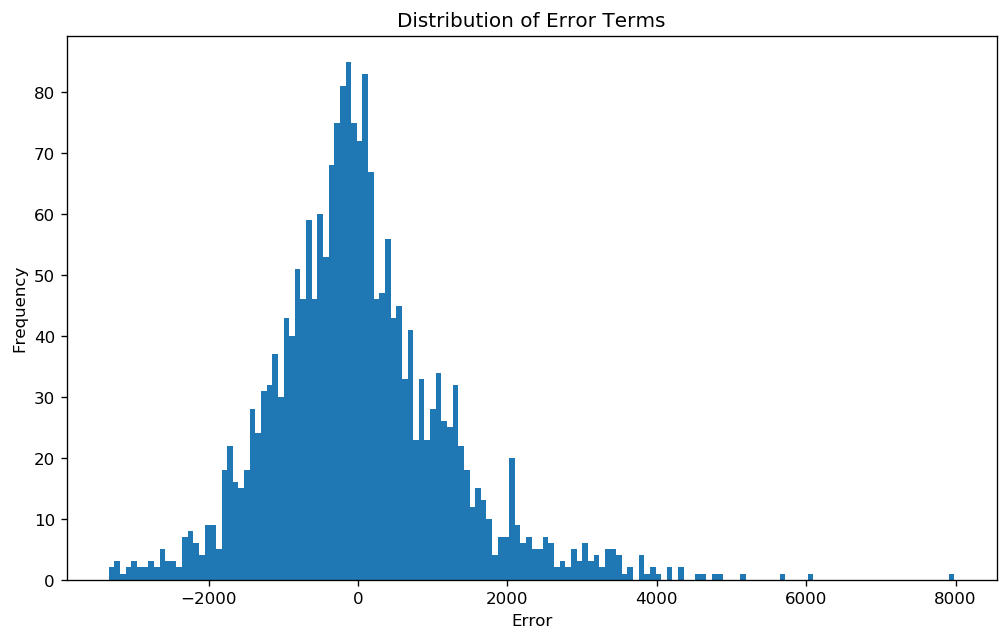

In [39]:
plt.figure(figsize = (10, 6), dpi = 120, facecolor='w', edgecolor='b')
plt.hist(residuals.residual, bins =150)
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Distribution of Error Terms')
plt.show()

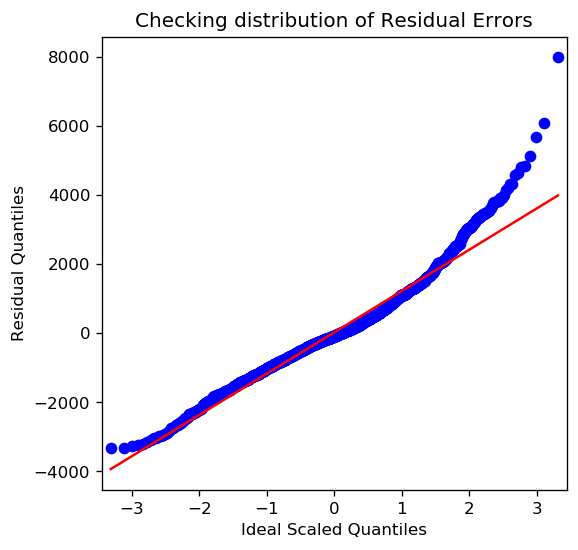

In [40]:
from statsmodels.graphics.gofplots import qqplot

fig, ax = plt.subplots(figsize = (5, 5), dpi = 120)
qqplot(residuals.residual, line = 's', ax = ax)
plt.ylabel('Residual Quantiles')
plt.xlabel('Ideal Scaled Quantiles')
plt.title('Checking distribution of Residual Errors')
plt.show()

In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant

VIF = pd.Series([vif(data.values, i ) for i in range(data.shape[1])], index = data.columns)
VIF

C:\Users\Admin\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Item_Weight                        2.349925
Item_Visibility                    1.101456
Item_MRP                           1.753170
Outlet_Establishment_Year               inf
Item_Outlet_Sales                  2.292720
Item_Fat_Content_LF                     inf
Item_Fat_Content_Low Fat                inf
Item_Fat_Content_Regular                inf
Item_Fat_Content_low fat                inf
Item_Fat_Content_reg                    inf
Item_Type_Baking Goods                  inf
Item_Type_Breads                        inf
Item_Type_Breakfast                     inf
Item_Type_Canned                        inf
Item_Type_Dairy                         inf
Item_Type_Frozen Foods                  inf
Item_Type_Fruits and Vegetables         inf
Item_Type_Hard Drinks                   inf
Item_Type_Health and Hygiene            inf
Item_Type_Household                     inf
Item_Type_Meat                          inf
Item_Type_Others                        inf
Item_Type_Seafood               

In [42]:
lr = LR(normalize= True)
lr.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [43]:
train_predict = lr.predict(train_x)
k = mae(train_predict, train_y)
print("Train error: ", k)

Train error:  819.7964175844807


In [44]:
test_predict = lr.predict(test_x)
k = mae(test_predict, test_y)
print("Train error: ", k)

Train error:  871.6221818864383


Text(0.5, 1.0, 'Normalized Coefficiet Plot')

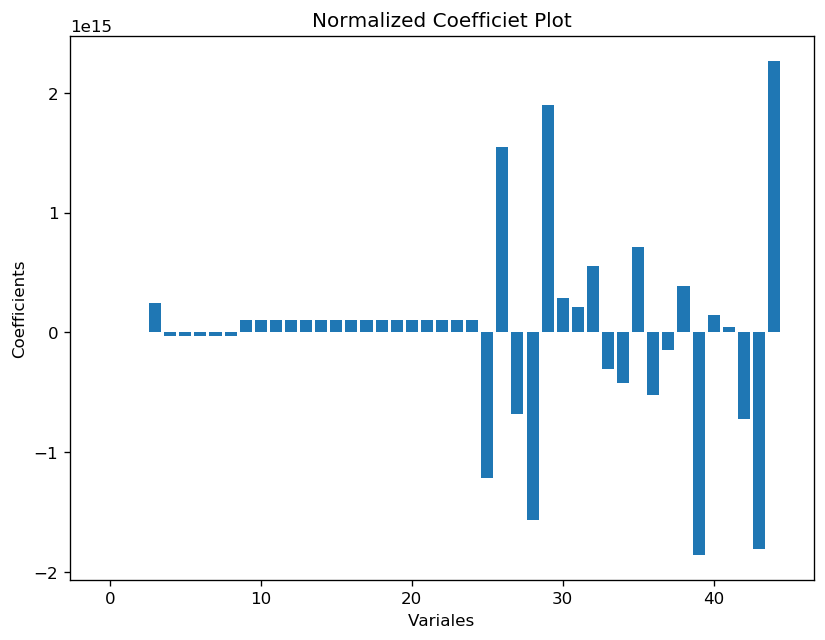

In [45]:
plt.figure(figsize = (8, 6), dpi = 120, facecolor='w', edgecolor='b')
x = range(len(train_x.columns))
y = lr.coef_
plt.bar(x, y)
plt.xlabel("Variales")
plt.ylabel("Coefficients")
plt.title("Normalized Coefficiet Plot")